Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 
###########################################
#             Movies Dataset              #    
###########################################


The Movies Dataset consists of  39135  total movies.


   movieId                               title                      genres  processed  release_date  vote_average      revenue    popular_cast                                              cover  oldMovieId
0        1                      Jumanji (1995)  Adventure|Children|Fantasy          1        1995.0           7.2  262797249.0   Kirsten Dunst  https://image.tmdb.org/t/p/w500/6aGn2X51bahFoO...           2
1        2             Grumpier Old Men (1995)              Comedy|Romance          1        1995.0           6.5   71500000.0    Daryl

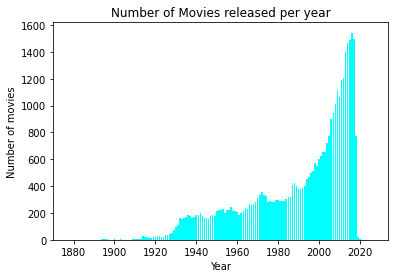



The average rating of each movie is  6 / 10. 


The highest grossing movie is  Avatar (2009)  with revenue of  2847246203 dollars.




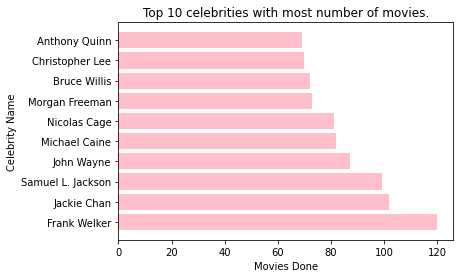

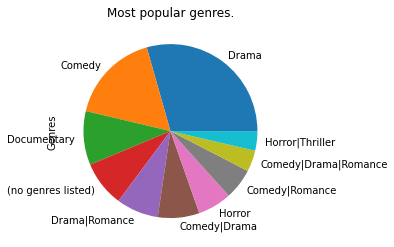




As we can see most popular Genre is " Drama " with 5000+ movies.









 
###########################################
#             Ratings Dataset             #    
###########################################


The Movies Dataset consists of  961156  total ratings.


   userId  movieId  rating   timestamp
0       1    276.0     3.5  1256677221
1       1    423.0     3.5  1256677456
2       1    893.0     1.5  1256677471
3       1   1021.0     4.5  1256677460
4       1   1188.0     4.5  1256677264

 


As we can see we have 4 main columns =>

userId      => The ID of the User who rated the user.
movieId     => The ID of the Movie which has been rated.
rating      => The Rating given by user for that movie, It is given out 5 stars.
timestamp   => The UNIX timestamp of the time user rated the movie.








The dataset has  10067  total unique Users.




At average each user has rated around  95.47591139366246  movies.


  


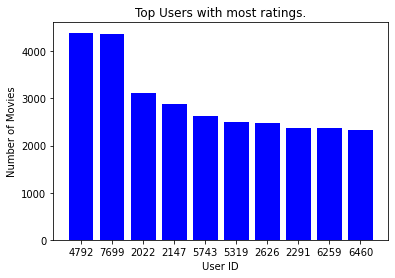





The mode of total ratings in the dataset is  4.0 
i.e the most occuring rating in the dataset is 4 stars.






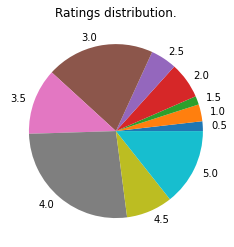

 

From the above graph we can see that most ratings are 4 stars,
followed by 3 stars, 5 stars etc.






In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



folder_location = "Dataset/"

pd.set_option('display.expand_frame_repr', False)



movies = pd.read_csv( folder_location + "movies_training.csv")
ratings = pd.read_csv( folder_location + "ratings_training.csv")


print(''' 
###########################################
#             Movies Dataset              #    
###########################################
''')

print()

print("The Movies Dataset consists of ", len(movies), " total movies.")

print()
print()

print(movies.head())

print()
print()

print(''' ''')


print()
print()

print(''' 

As we can see we have 7 main columns =>

moviedId         =>  The ID of the movie.
title            =>  The name of the movie.
genres           =>  Genres the movies belongs to.
release_date     =>  The year movie was released.
vote_average     =>  The overall rating of movie.
revenue          =>  Box office revenue of Movie.
popular_cast     =>  The highlight cast of the movie.

''')





print()
print()

df = movies.groupby(by=[movies.release_date]).agg("count")

plt.figure()
plt.bar(df.index.values, df["movieId"].values, color="cyan" )
plt.xlabel("Year")
plt.ylabel("Number of movies")
#plt.xticks(np.arange(0 , len(df["movieId"].values),  90))
plt.title("Number of Movies released per year")
plt.show()




print()
print()



meanrating = movies["vote_average"].mean()

print("The average rating of each movie is ", int(meanrating) , "/ 10. ")


highestGrossing  = movies.iloc[movies["revenue"].idxmax()]

print()
print()

print("The highest grossing movie is ", highestGrossing["title"] , " with revenue of ", int(highestGrossing["revenue"]) , "dollars." )

print()
print()

df = movies.groupby(by=[movies.popular_cast]).agg("count")
df = df.sort_values(by=["movieId"], ascending=False).iloc[0 : 10]

plt.figure()
plt.barh(df.index.values, df["movieId"].values, color="pink" )
plt.xlabel("Movies Done")
plt.ylabel("Celebrity Name")
#plt.xticks(np.arange(0 , len(df["movieId"].values),  90))
plt.title("Top 10 celebrities with most number of movies.")
plt.show()


print(''' 




''')




df = movies.groupby(by=[movies.genres]).agg("count")
df = df.sort_values(by=["movieId"], ascending=False).iloc[0 : 10]

plt.figure()
plt.pie( df["movieId"].values, labels=df.index.values)
plt.ylabel("Genres")
#plt.xticks(np.arange(0 , len(df["movieId"].values),  90))
plt.title("Most popular genres.")
plt.show()

print('''


As we can see most popular Genre is " Drama " with 5000+ movies.








''')






print(''' 
###########################################
#             Ratings Dataset             #    
###########################################
''')

print()

print("The Movies Dataset consists of ", len(ratings), " total ratings.")

print()
print()

print(ratings.head())

print()
print(''' 


As we can see we have 4 main columns =>

userId      => The ID of the User who rated the user.
movieId     => The ID of the Movie which has been rated.
rating      => The Rating given by user for that movie, It is given out 5 stars.
timestamp   => The UNIX timestamp of the time user rated the movie.





''')


totalUsers = len(ratings.userId.unique())

print('''

The dataset has ''', totalUsers ,''' total unique Users.

''')

avgTotalRatings = ratings.groupby(by=[ratings.userId]).agg("count").rating.mean()



print('''

At average each user has rated around ''',  avgTotalRatings ,''' movies.

''')


print("  ")



df = ratings.groupby(by=[ratings.userId]).agg("count")
df = df.sort_values(by=["rating"], ascending=False).iloc[0 : 10]
plt.figure()
plt.bar(df.index.values.astype(str), df["rating"].values, color="blue" )
plt.xlabel("User ID")
plt.ylabel("Number of Movies")
#plt.xticks(np.arange(0 , len(df["movieId"].values),  90))
plt.title("Top Users with most ratings.")
plt.show()



print('''



The mode of total ratings in the dataset is ''' , ratings.rating.mode().item() , '''
i.e the most occuring rating in the dataset is 4 stars.



''')

df = ratings.groupby(by=[ratings.rating]).agg("count")
plt.figure()
plt.pie( df["movieId"].values, labels=df.index.values )

#plt.xticks(np.arange(0 , len(df["movieId"].values),  90))
plt.title("Ratings distribution.")
plt.show()

print(''' 

From the above graph we can see that most ratings are 4 stars,
followed by 3 stars, 5 stars etc.



''')

